# Coding Implementation of Stochastic Gradient

Stochastic gradient descent is a very popular and common algorithm used in various Machine Learning algorithms, most importantly forms the basis of Neural Networks. 

I recommend proper knowledge of Linear Regression and how it works for proper understanding of this topic.

Also before coming to the coding implmentation, go through the theory in the Readme file to understand how the things are actually working internally in this method.

We have used the Iris Data Set for our implmentation. This is a famous dataset and is used for Classification as it contains 3 species of Iris:
- Setosa
- Versicolor
- Vriginica

Now let's get into the coding and see how things are working.

## Data prepration
We load the Iris dataset that is by default available in the Scikit learn module

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()  

The iris dataset comes in a dictionary data structure. So the features of the dataset are stored in a key "data" and the target is inside a key "target". So here we list all the keys in the dictionary.

In [ ]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

We dont need all thenkeys. We only require the features and the respective classes or target. So we store them under attributes in a pandas dataframe. Data or the features are stored in a dataframe **ir** and we make a new **Species** column to store the target.

In [ ]:
import pandas as pd
ir = pd.DataFrame(iris['data'])
ir['Species'] = pd.DataFrame(iris['target'])
ir #printing the entire dataframe

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In the species column, there are numbers only. But those numbers represent the species of the iris flower. Like we have 3 species of Iris, Setosa, versicolor and Virginica. So we are assigning each number the specie name.

In [ ]:
ir['Species'] = ir['Species'].replace({0: "setosa", 1: "versicolor", 2: 'virginica'})

We can use Stochastic Gradient in 3 classes as well. But to make it simpler to understand I am converting this dataframe in a binary dataframe. Basically I am assigning the species with Setosa with 1 and the rest all Species with 0. So my model with predict that whther the given features are of Setosa or not.

In [ ]:
for i in range(len(ir['Species'])):
    if ir['Species'][i] == 'setosa':
        ir['Species'][i] = 1
    else:
        ir['Species'][i] = 0
ir['Species']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: Species, Length: 150, dtype: object

First, we will separate the dataset as training set and test set using the train_test_split function in sklearn library. Before that, the features and the target needs to be separated.

The features that is x1,x2 and so on are stored in ir_features and the target variable stored in ir_label

In [ ]:
from sklearn.model_selection import train_test_split
ir_features = ir.drop(columns = 'Species')
ir_label = ir['Species']
x_train, x_test, y_train, y_test = train_test_split(
    ir_features, ir_label, 
    test_size = 0.2,
    random_state = 10
)

Now, we have training and test set separately. As I explained before, we will randomly select a few data points for each iteration in SGD method. I will combine the x_train and y_train because we will need the y_train as well for training

In [ ]:
x_train['Species'] = y_train
df = x_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Below is the function to randomly select 12 data points from the training set for each iteration. In the original iris dataset, there were 50 ‘setosa’ and 100 other species. That means there are 50 positive class and 100 negative class data. The sample should be accorning to that ratio. So, let’s take 4 data from the positive class and 8 data from the negative class.

In [ ]:
def stratified_spl(df):
    df1 = df[df['Species'] == 1]
    df0 = df[df['Species'] == 0]
    df1_spl = df1.sample(n=4)
    df0_spl = df0.sample(n=8)
    return pd.concat([df1_spl, df0_spl])


here we have used the Signmoid Activation function.
Sigmoid activation function is a binary classifier and it classifies a given input in two catergories,either 0 or 1.

The mathematical Equation is given as below

![picture](https://drive.google.com/uc?id=1i5N_Fz9JNKTKzzIP7-CPGY5RnFeLuLs4)

The Graph of this function is as follows

![picture](https://drive.google.com/uc?id=1ZPvwsG7QohyAHZCy46v2IN2e6Y58jDnO)

As you can clearly see that it sets the values to either 0 or 1

In [ ]:
def hypothesis(X, w):
    z = np.dot(w, X.T)
    return 1/(1+np.exp(-(z)))

The next function will separate the features and target of the mini training set of 12 data again for the training purpose.
As you can see in the linear formula above, we need a bias W0. An extra feature of 1s is added as a bias term. We will improve the bias term as well in each iteration.

In [ ]:
def xy(df):
    df_features = df.drop(columns = 'Species')
    df_label = df['Species']
    df_features['00'] = [1]*12
    return df_features, df_label

This function will calculate the predicted target first and then the Mean Square Error(MSE).

In [ ]:
def error(X, y, w):
    n = len(X)
    yp = hypothesis(X, w)
    return np.sum((yp-y)**2)/n

All the functions are ready. Now gradient descent function. In each iteration,
1. It will sample 12 data points using the stratified_spl function defined before.
2. Then split the features and target as X and y.
3. Calculate the predicted y using Ws and Xs.
4. Update the Ws using the gradient descent formula.

Here we collect the errors in each iteration and the Ws.

In [ ]:
def grad_des(df, w, alpha, epoch):
    j = []
    w1 = []
    w1.append(w)
    for i in range(epoch):
        d = stratified_spl(df)
        X, y = xy(d)
        n= len(X)
        yp = hypothesis(X, w)
        
        for i in range(4):
            w[i] -= (alpha/n) * np.sum(-2*X[i]*(y-yp))
        w[4] -= (alpha/n) *np.sum(-2*(y-yp))
        w1.append(list(w))
        j.append(error(X, y, w))
    return j, w1

We are randomly initializing Ws. There are total of five features including the bias. So, for each feature or X, we need to initialize a W as we saw in the linear formula in the beginning.

In [ ]:
import numpy as np
w = np.random.rand(5)
w

array([0.60308338, 0.55779124, 0.19924558, 0.13887832, 0.76156233])

Now, use the gradient descent function using the step size (alpha) as 0.01 for 100 iterations.

In [ ]:
j, w1 = grad_des(x_train, w, 0.01, 100)

This should give us 100 w1 for 100 iterations. Using this 100 w1s, we can calculate 100 MSEs to observe the change in MSE in each iteration. I need a function that should calculate the predicted y for each w1 and then error.

In [ ]:
def err_test(X, y, w):
    er = []
    for i in range(len(w1)):
        er.append(error(X, y, w[i]))
    return er

This is the plot function and we are visualising the MSE in each iteration.

In [ ]:
def plot(X, y, w):
    error = err_test(X, y, w)
    return plt.scatter(range(len(error)), error)

in the above we have added the target column in x_train. So we drop or remove that column and add the bias.

In [ ]:
X = x_train.drop(columns = 'Species')
X['00'] = [1]*len(X)

This part plots the MSE for training set

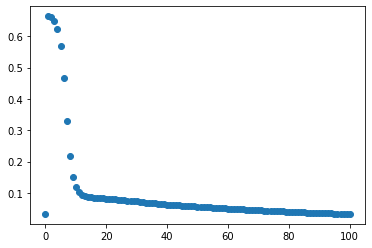

In [ ]:
import matplotlib.pyplot as plt
plot(X, y_train, w1)

This is the accuracy function to check the accuracy.

In [ ]:
def accuracy(X, y, w):
    yp = hypothesis(X, w)
    for i in range(len(yp)):
        if yp[i] >=0.5:
            yp[i] = 1
        else:
            yp[i] = 0
    return sum(yp == y)/len(y)

Now to understand how accuracy changews with each iteration we have define this function.

In [ ]:
def accuracy_series(X, y, w1):
    acc = []
    for i in range(len(w1)):
        acc.append(accuracy(X, y, w1[i]))  
    return acc

We are using this function to see the accuracy series for the training set.

In [ ]:
np.array(accuracy_series(X, y_train, w1))

array([1.        , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.425     , 0.91666667,
       0.99166667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

You can see that with each iteration the accuracy has changed. Initially it was 33% then it increased to 42.5% and then to 91.6% and to 99.1%. Finally the accuracy became 100% or 1 which means our model has zero error and is 100% accurate.